### Data Analysis of Coronavirus Outbreak with Julia
+ Questions
  - List of countries affected
  - Number of Cases Per Country/Per Day
  - Plots

#### Pkgs
+ CSV
+ DataFrames
+ Plots
+ StatsPlots
+ DataStructures
+ PyCall
+ etc

In [1]:
# URL
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [ ]:
# Installing Pkgs
using Pkg
Pkg.add("DataFrames")

In [2]:
# Load Pkgs
using CSV,DataFrames

In [3]:
# Load Our Dataset
confirmed_df = CSV.read(download(confirmed_cases_url))
recovered_df = CSV.read(download(recovered_cases_url))
death_df = CSV.read(download(death_cases_url))

,Province/State,Country/Region,Lat,Long,1/22/20
,String⍰,String,Float64,Float64,Int64
1,missing,Afghanistan,33.0,65.0,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [4]:
# First 10 rows
# head() Deprecated
first(confirmed_df,10)

,Province/State,Country/Region,Lat,Long,1/22/20
,String⍰,String,Float64,Float64,Int64
1,missing,Afghanistan,33.0,65.0,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [5]:
# last rows
last(confirmed_df,10)

,Province/State,Country/Region,Lat,Long,1/22/20
,String⍰,String,Float64,Float64,Int64
1,missing,Burundi,-3.3731,29.9189,0
2,missing,Sierra Leone,8.46056,-11.7799,0
3,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0
4,missing,Malawi,-13.2543,34.3015,0
5,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,0
6,Saint Pierre and Miquelon,France,46.8852,-56.3159,0
7,missing,South Sudan,6.877,31.307,0
8,missing,Western Sahara,24.2155,-12.8858,0
9,missing,Sao Tome and Principe,0.18636,6.61308,0


In [6]:
# Columns
names(confirmed_df)

89-element Array{Symbol,1}:
 Symbol("Province/State")
 Symbol("Country/Region")
 :Lat
 :Long
 Symbol("1/22/20")
 Symbol("1/23/20")
 Symbol("1/24/20")
 Symbol("1/25/20")
 Symbol("1/26/20")
 Symbol("1/27/20")
 Symbol("1/28/20")
 Symbol("1/29/20")
 Symbol("1/30/20")
 ⋮
 Symbol("4/4/20")
 Symbol("4/5/20")
 Symbol("4/6/20")
 Symbol("4/7/20")
 Symbol("4/8/20")
 Symbol("4/9/20")
 Symbol("4/10/20")
 Symbol("4/11/20")
 Symbol("4/12/20")
 Symbol("4/13/20")
 Symbol("4/14/20")
 Symbol("4/15/20")

In [7]:
size(confirmed_df)

(264, 89)

In [8]:
size(recovered_df)

(250, 89)

In [9]:
size(death_df)

(264, 89)

In [ ]:
# Restructure our DF


In [11]:
#dir()
names(DataFrames,all=true)

959-element Array{Symbol,1}:
 Symbol("##DataFrame!#113")
 Symbol("##DataFrame!#114")
 Symbol("##DataFrame!#115")
 Symbol("##DataFrame#100")
 Symbol("##DataFrame#103")
 Symbol("##DataFrame#104")
 Symbol("##DataFrame#105")
 Symbol("##DataFrame#108")
 Symbol("##DataFrame#109")
 Symbol("##DataFrame#110")
 Symbol("##DataFrame#111")
 Symbol("##DataFrame#112")
 Symbol("##DataFrame#156")
 ⋮
 :titlecase
 :uncompact
 :unique!
 :unstack
 :update_row_maps!
 :upgrade_scalar
 :uppercase
 :uppercasefirst
 :view
 :without
 :wrap
 :writetable

In [12]:
# Check for melt
:melt in names(DataFrames,all=true)

true

In [13]:
names(confirmed_df)

89-element Array{Symbol,1}:
 Symbol("Province/State")
 Symbol("Country/Region")
 :Lat
 :Long
 Symbol("1/22/20")
 Symbol("1/23/20")
 Symbol("1/24/20")
 Symbol("1/25/20")
 Symbol("1/26/20")
 Symbol("1/27/20")
 Symbol("1/28/20")
 Symbol("1/29/20")
 Symbol("1/30/20")
 ⋮
 Symbol("4/4/20")
 Symbol("4/5/20")
 Symbol("4/6/20")
 Symbol("4/7/20")
 Symbol("4/8/20")
 Symbol("4/9/20")
 Symbol("4/10/20")
 Symbol("4/11/20")
 Symbol("4/12/20")
 Symbol("4/13/20")
 Symbol("4/14/20")
 Symbol("4/15/20")

In [15]:
melt(confirmed_df,[Symbol("Province/State"),Symbol("Country/Region"),:Lat,:Long])

┌ Warning: `melt(df::AbstractDataFrame, id_vars; variable_name::Symbol = :variable, value_name::Symbol = :value, view::Bool = false)` is deprecated, use `stack(df, Not(id_vars); variable_name = variable_name, value_name = value_name, view = view)` instead.
│   caller = top-level scope at In[15]:1
└ @ Core In[15]:1


,variable,value,Province/State,Country/Region,Lat
,Symbol,Int64,String⍰,String,Float64
1,1/22/20,0,missing,Afghanistan,33.0
2,1/22/20,0,missing,Albania,41.1533
3,1/22/20,0,missing,Algeria,28.0339
4,1/22/20,0,missing,Andorra,42.5063
5,1/22/20,0,missing,Angola,-11.2027
6,1/22/20,0,missing,Antigua and Barbuda,17.0608
7,1/22/20,0,missing,Argentina,-38.4161
8,1/22/20,0,missing,Armenia,40.0691
9,1/22/20,0,Australian Capital Territory,Australia,-35.4735


In [16]:
# Keep these as variables
stack(confirmed_df,[Symbol("Province/State"),Symbol("Country/Region"),:Lat,:Long])

,variable,value,1/22/20,1/23/20,1/24/20,1/25/20
,Symbol,Any,Int64,Int64,Int64,Int64
1,Province/State,missing,0,0,0,0
2,Province/State,missing,0,0,0,0
3,Province/State,missing,0,0,0,0
4,Province/State,missing,0,0,0,0
5,Province/State,missing,0,0,0,0
6,Province/State,missing,0,0,0,0
7,Province/State,missing,0,0,0,0
8,Province/State,missing,0,0,0,0
9,Province/State,Australian Capital Territory,0,0,0,0


In [17]:
# Keep these as variables
stack(confirmed_df,Not([Symbol("Province/State"),Symbol("Country/Region"),:Lat,:Long]))

,variable,value,Province/State,Country/Region,Lat
,Symbol,Int64,String⍰,String,Float64
1,1/22/20,0,missing,Afghanistan,33.0
2,1/22/20,0,missing,Albania,41.1533
3,1/22/20,0,missing,Algeria,28.0339
4,1/22/20,0,missing,Andorra,42.5063
5,1/22/20,0,missing,Angola,-11.2027
6,1/22/20,0,missing,Antigua and Barbuda,17.0608
7,1/22/20,0,missing,Argentina,-38.4161
8,1/22/20,0,missing,Armenia,40.0691
9,1/22/20,0,Australian Capital Territory,Australia,-35.4735


In [19]:
df_confirmed = stack(confirmed_df,Not([Symbol("Province/State"),Symbol("Country/Region"),:Lat,:Long]));

In [20]:
df_recovered = stack(recovered_df,Not([Symbol("Province/State"),Symbol("Country/Region"),:Lat,:Long]));
df_death = stack(death_df,Not([Symbol("Province/State"),Symbol("Country/Region"),:Lat,:Long]));

In [21]:
head(df_confirmed)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[21]:1
└ @ Core In[21]:1


,variable,value,Province/State,Country/Region,Lat,Long
,Symbol,Int64,String⍰,String,Float64,Float64
1,1/22/20,0,missing,Afghanistan,33.0,65.0
2,1/22/20,0,missing,Albania,41.1533,20.1683
3,1/22/20,0,missing,Algeria,28.0339,1.6596
4,1/22/20,0,missing,Andorra,42.5063,1.5218
5,1/22/20,0,missing,Angola,-11.2027,17.8739
6,1/22/20,0,missing,Antigua and Barbuda,17.0608,-61.7964


In [22]:
first(df_confirmed,10)

,variable,value,Province/State,Country/Region,Lat,Long
,Symbol,Int64,String⍰,String,Float64,Float64
1,1/22/20,0,missing,Afghanistan,33.0,65.0
2,1/22/20,0,missing,Albania,41.1533,20.1683
3,1/22/20,0,missing,Algeria,28.0339,1.6596
4,1/22/20,0,missing,Andorra,42.5063,1.5218
5,1/22/20,0,missing,Angola,-11.2027,17.8739
6,1/22/20,0,missing,Antigua and Barbuda,17.0608,-61.7964
7,1/22/20,0,missing,Argentina,-38.4161,-63.6167
8,1/22/20,0,missing,Armenia,40.0691,45.0382
9,1/22/20,0,Australian Capital Territory,Australia,-35.4735,149.012


In [23]:
size(df_confirmed)

(22440, 6)

In [24]:
size(df_recovered)

(21250, 6)

In [26]:
size(df_death)

(22440, 6)

In [27]:
names(df_confirmed)

6-element Array{Symbol,1}:
 :variable
 :value
 Symbol("Province/State")
 Symbol("Country/Region")
 :Lat
 :Long

In [28]:
# Renaming
rename!(df_confirmed,Dict(:variable => :Dates,:value => :Confirmed))

,Dates,Confirmed,Province/State,Country/Region,Lat
,Symbol,Int64,String⍰,String,Float64
1,1/22/20,0,missing,Afghanistan,33.0
2,1/22/20,0,missing,Albania,41.1533
3,1/22/20,0,missing,Algeria,28.0339
4,1/22/20,0,missing,Andorra,42.5063
5,1/22/20,0,missing,Angola,-11.2027
6,1/22/20,0,missing,Antigua and Barbuda,17.0608
7,1/22/20,0,missing,Argentina,-38.4161
8,1/22/20,0,missing,Armenia,40.0691
9,1/22/20,0,Australian Capital Territory,Australia,-35.4735


In [30]:
# Renaming
rename!(df_recovered,Dict(:variable => :Dates,:value => :Recovered));
rename!(df_death,Dict(:variable => :Dates,:value => :Deaths));

In [31]:
df_recovered

,Dates,Recovered,Province/State,Country/Region,Lat
,Symbol,Int64,String⍰,String,Float64
1,1/22/20,0,missing,Afghanistan,33.0
2,1/22/20,0,missing,Albania,41.1533
3,1/22/20,0,missing,Algeria,28.0339
4,1/22/20,0,missing,Andorra,42.5063
5,1/22/20,0,missing,Angola,-11.2027
6,1/22/20,0,missing,Antigua and Barbuda,17.0608
7,1/22/20,0,missing,Argentina,-38.4161
8,1/22/20,0,missing,Armenia,40.0691
9,1/22/20,0,Australian Capital Territory,Australia,-35.4735


In [37]:
# Joining or Merging
df = join(df_confirmed,df_death[!,[:Deaths,Symbol("Country/Region")]],on =Symbol("Country/Region"))

,Dates,Confirmed,Province/State,Country/Region,Lat,Long,Deaths
,Symbol,Int64,String⍰,String,Float64,Float64,Int64
1,1/22/20,0,missing,Afghanistan,33.0,65.0,0
2,1/22/20,0,missing,Afghanistan,33.0,65.0,0
3,1/22/20,0,missing,Afghanistan,33.0,65.0,0
4,1/22/20,0,missing,Afghanistan,33.0,65.0,0
5,1/22/20,0,missing,Afghanistan,33.0,65.0,0
6,1/22/20,0,missing,Afghanistan,33.0,65.0,0
7,1/22/20,0,missing,Afghanistan,33.0,65.0,0
8,1/22/20,0,missing,Afghanistan,33.0,65.0,0
9,1/22/20,0,missing,Afghanistan,33.0,65.0,0


In [38]:
# Save DF
CSV.write("covid_current_cases_dataset.csv",df)

"covid_current_cases_dataset.csv"

### Analysis
+ Number of Case Per Country
+ Per day
+ Top countries affected
+ Number of Countries affected

In [39]:
# Number of Countries affected
first(df,10)

,Dates,Confirmed,Province/State,Country/Region,Lat,Long,Deaths
,Symbol,Int64,String⍰,String,Float64,Float64,Int64
1,1/22/20,0,missing,Afghanistan,33.0,65.0,0
2,1/22/20,0,missing,Afghanistan,33.0,65.0,0
3,1/22/20,0,missing,Afghanistan,33.0,65.0,0
4,1/22/20,0,missing,Afghanistan,33.0,65.0,0
5,1/22/20,0,missing,Afghanistan,33.0,65.0,0
6,1/22/20,0,missing,Afghanistan,33.0,65.0,0
7,1/22/20,0,missing,Afghanistan,33.0,65.0,0
8,1/22/20,0,missing,Afghanistan,33.0,65.0,0
9,1/22/20,0,missing,Afghanistan,33.0,65.0,0


In [41]:
unique(df[!,Symbol("Country/Region")])

185-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 ⋮
 "Saint Kitts and Nevis"
 "Kosovo"
 "Burma"
 "MS Zaandam"
 "Botswana"
 "Burundi"
 "Sierra Leone"
 "Malawi"
 "South Sudan"
 "Western Sahara"
 "Sao Tome and Principe"
 "Yemen"

In [42]:
# Number 
length(unique(df[!,Symbol("Country/Region")]))

185

In [43]:
# Number of Cases Per Country
by(df,Symbol("Country/Region"),counts=:Confirmed => sum)

,Country/Region,counts
,String,Int64
1,Afghanistan,699380
2,Albania,685610
3,Algeria,2400825
4,Andorra,938910
5,Angola,23885
6,Antigua and Barbuda,27540
7,Argentina,2770575
8,Armenia,1469055
9,Australia,84688560


In [44]:
# Number of Cases Per Country with Max
by(df,Symbol("Country/Region"),counts=:Confirmed => maximum)

,Country/Region,counts
,String,Int64
1,Afghanistan,784
2,Albania,494
3,Algeria,2160
4,Andorra,673
5,Angola,19
6,Antigua and Barbuda,23
7,Argentina,2443
8,Armenia,1111
9,Australia,2886


In [45]:
cases_per_countries = by(df,Symbol("Country/Region"),counts=:Confirmed => maximum)

,Country/Region,counts
,String,Int64
1,Afghanistan,784
2,Albania,494
3,Algeria,2160
4,Andorra,673
5,Angola,19
6,Antigua and Barbuda,23
7,Argentina,2443
8,Armenia,1111
9,Australia,2886


In [46]:
names(cases_per_countries)

2-element Array{Symbol,1}:
 Symbol("Country/Region")
 :counts

In [62]:
# Top Countries Affected
sort(cases_per_countries,:counts,rev=true)


,Country/Region,counts
,String,Int64
1,US,636350
2,Spain,177644
3,Italy,165155
4,France,136779
5,Germany,134753
6,United Kingdom,98476
7,Iran,76389
8,Turkey,69392
9,China,67803


In [69]:
sort(cases_per_countries,:counts,rev=true)[1:10,:]

,Country/Region,counts
,String,Int64
1,US,636350
2,Spain,177644
3,Italy,165155
4,France,136779
5,Germany,134753
6,United Kingdom,98476
7,Iran,76389
8,Turkey,69392
9,China,67803


In [70]:
# Group by Day
df

,Dates,Confirmed,Province/State,Country/Region,Lat,Long,Deaths
,Symbol,Int64,String⍰,String,Float64,Float64,Int64
1,1/22/20,0,missing,Afghanistan,33.0,65.0,0
2,1/22/20,0,missing,Afghanistan,33.0,65.0,0
3,1/22/20,0,missing,Afghanistan,33.0,65.0,0
4,1/22/20,0,missing,Afghanistan,33.0,65.0,0
5,1/22/20,0,missing,Afghanistan,33.0,65.0,0
6,1/22/20,0,missing,Afghanistan,33.0,65.0,0
7,1/22/20,0,missing,Afghanistan,33.0,65.0,0
8,1/22/20,0,missing,Afghanistan,33.0,65.0,0
9,1/22/20,0,missing,Afghanistan,33.0,65.0,0


In [71]:
# Number of Cases Per Day with Max
by(df,:Dates,counts=:Confirmed => maximum)

,Dates,counts
,Symbol,Int64
1,1/22/20,444
2,1/23/20,444
3,1/24/20,549
4,1/25/20,761
5,1/26/20,1058
6,1/27/20,1423
7,1/28/20,3554
8,1/29/20,3554
9,1/30/20,4903


In [73]:
# Number of Cases Per Day with Max
cases_per_dates = by(df,:Dates,counts=:Confirmed => maximum)

,Dates,counts
,Symbol,Int64
1,1/22/20,444
2,1/23/20,444
3,1/24/20,549
4,1/25/20,761
5,1/26/20,1058
6,1/27/20,1423
7,1/28/20,3554
8,1/29/20,3554
9,1/30/20,4903


In [74]:
sort(cases_per_dates,:counts,rev=true)[1:10,:]

,Dates,counts
,Symbol,Int64
1,4/15/20,636350
2,4/14/20,607670
3,4/13/20,580619
4,4/12/20,555313
5,4/11/20,526396
6,4/10/20,496535
7,4/9/20,461437
8,4/8/20,429052
9,4/7/20,396223


### Data Visualization
+ Plots
+ StatsPlots
+ Gadfly
+ Plotly

In [75]:
using Plots, StatsPlots

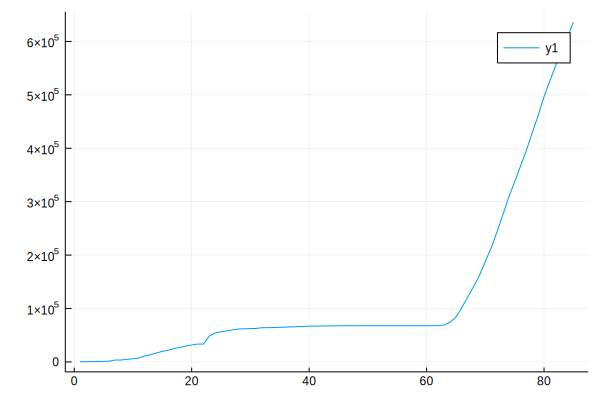

In [76]:
@df cases_per_dates plot(x=:Dates,:counts)

In [77]:
# Value Counts
value_counts = by(df,Symbol("Country/Region"),nrow)

,Country/Region,x1
,String,Int64
1,Afghanistan,7225
2,Albania,7225
3,Algeria,7225
4,Andorra,7225
5,Angola,7225
6,Antigua and Barbuda,7225
7,Argentina,7225
8,Armenia,7225
9,Australia,462400


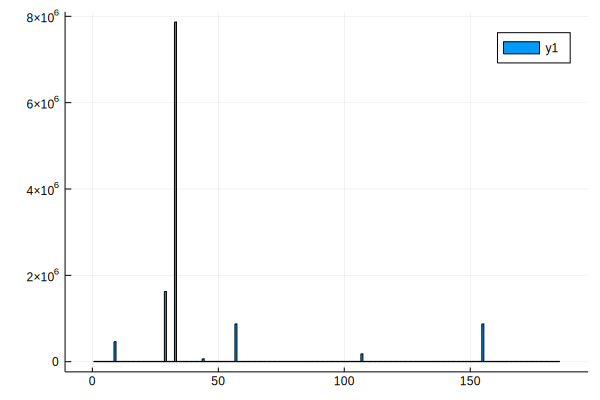

In [79]:
@df value_counts bar(x=Symbol("Country/Region"),:x1)

In [80]:
cases_per_countries

,Country/Region,counts
,String,Int64
1,Afghanistan,784
2,Albania,494
3,Algeria,2160
4,Andorra,673
5,Angola,19
6,Antigua and Barbuda,23
7,Argentina,2443
8,Armenia,1111
9,Australia,2886


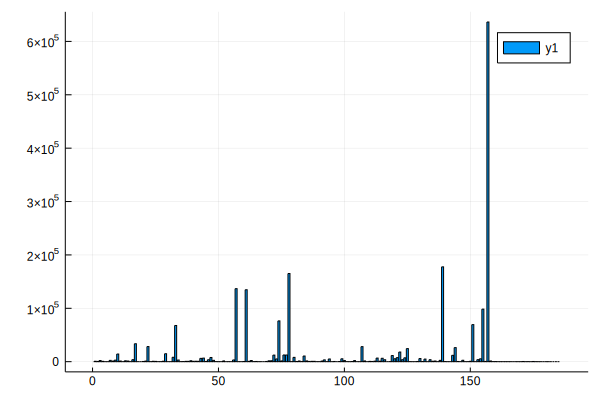

In [81]:
# Bar Chary
@df cases_per_countries bar(x=Symbol("Country/Region"),:counts)

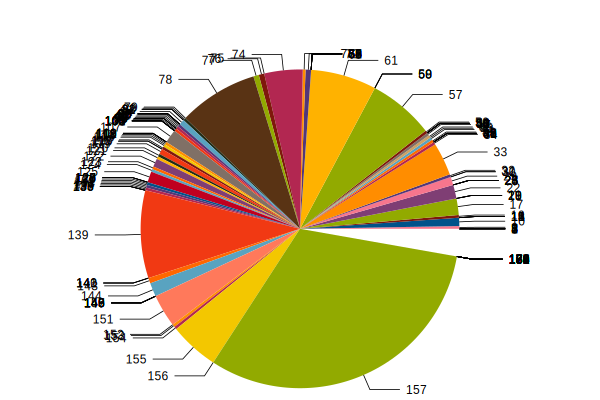

In [82]:
# Pie chart
@df cases_per_countries pie(x=Symbol("Country/Region"),:counts)

In [83]:
using DataStructures

In [84]:
DataStructures.counter(df[!,Symbol("Country/Region")])

Accumulator{String,Int64} with 185 entries:
  "Peru"               => 7225
  "Indonesia"          => 7225
  "Gabon"              => 7225
  "North Macedonia"    => 7225
  "Bangladesh"         => 7225
  "Kosovo"             => 7225
  "Ethiopia"           => 7225
  "Dominican Republic" => 7225
  "Vietnam"            => 7225
  "South Sudan"        => 7225
  "Morocco"            => 7225
  "Libya"              => 7225
  "US"                 => 7225
  "Sierra Leone"       => 7225
  "Serbia"             => 7225
  "Malaysia"           => 7225
  "Mali"               => 7225
  "West Bank and Gaza" => 7225
  "Western Sahara"     => 7225
  "Russia"             => 7225
  "Mongolia"           => 7225
  "Tunisia"            => 7225
  "Kuwait"             => 7225
  "Eswatini"           => 7225
  "Cuba"               => 7225
  ⋮                    => ⋮

#### Thanks For Watching
+ Jesus Saves
+ Jesse E.Agbe(JCharis)

# Using Geopandas in Julia
#### PyCall
```julia
Pkg.add("PyCall")
```
#### Geopandas
```python
pip install geopandas
```

In [85]:
using PyCall

In [86]:
gpd = pyimport("geopandas")

PyObject <module 'geopandas' from '/usr/local/lib/python3.6/dist-packages/geopandas/__init__.py'>

In [87]:
first(df,5)

,Dates,Confirmed,Province/State,Country/Region,Lat,Long,Deaths
,Symbol,Int64,String⍰,String,Float64,Float64,Int64
1,1/22/20,0,missing,Afghanistan,33.0,65.0,0
2,1/22/20,0,missing,Afghanistan,33.0,65.0,0
3,1/22/20,0,missing,Afghanistan,33.0,65.0,0
4,1/22/20,0,missing,Afghanistan,33.0,65.0,0
5,1/22/20,0,missing,Afghanistan,33.0,65.0,0


In [88]:
df.Lat

13236200-element Array{Float64,1}:
 33.0
 33.0
 33.0
 33.0
 33.0
 33.0
 33.0
 33.0
 33.0
 33.0
 33.0
 33.0
 33.0
  ⋮
 15.552726999999999
 15.552726999999999
 15.552726999999999
 15.552726999999999
 15.552726999999999
 15.552726999999999
 15.552726999999999
 15.552726999999999
 15.552726999999999
 15.552726999999999
 15.552726999999999
 15.552726999999999

In [ ]:
gdf = gpd.DataFrame(df,geometry=gpd.points_from_xy(df.Lat,df.Long))